# Project: Wrangling and Analyze Data

In [134]:
#importing all the required modules 

import pandas as pd
import numpy as np
import requests as rs
import seaborn as sn
import matplotlib.pyplot as plt
import os
import datetime
import tweepy
import json


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [135]:
#reading the first type of that which is CSV which is quite easy
df_tw_en=pd.read_csv('twitter-archive-enhanced.csv')
df_tw_en.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [136]:
df_tw_en.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [137]:

#reading the second set of data by the request.get method and storing that. to in 'tw_en' variable
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
tw_en=rs.get(url)
#HTTPS response 200 means that file have been sucessfully saved into the working directory of the computer. 
tw_en



<Response [200]>

In [138]:

#opening the .tsv (tab seperated file) into the write mode and saving then saving the contents of the saved file.
with open ('image-pdictions.tsv', mode='wb') as fd:
    fd.write(tw_en.content)

In [139]:

#reading the tsv file
df_im=pd.read_csv('image-pdictions.tsv',sep='\t')
df_im.head()
    


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [140]:
df_im.shape

(2075, 12)

Reference:- https://www.tutorialspoint.com/downloading-files-from-web-using-python

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

I have applied for the Developer account access but have not received yet so using the tweet_json file, I have taken this code from the addtional resourses and understood how the code works in real time.When ever I will get the access of the developer account I will try to get the data using twitter API.

In [141]:
#installing modules
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#authentication by using seceret keys

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)


# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. Yenhanced.csv
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
 #   for tweet_id in tweet_ids:
  #      count += 1
   #     print(str(count) + ": " + str(tweet_id))
    #    try:
     #       tweet = api.get_status(tweet_id, tweet_mode='extended')
      #      print("Success")
       #     json.dump(tweet._json, outfile)
        #    outfile.write('\n')
       # except tweepy.TweepError as e:
        #    print("Fail")
         #   fails_dict[tweet_id] = e
          #  pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [142]:

# using the twweet-json.txt file which is given in the course supporting material

#creating the list variable 
tweet_list=[]

#opening the file as json_file variable and looping trough each line and then
#saving the result in data variable
with open('tweet-json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        #created the dictionary from that each json line with three columns
        #and then appended the dictionary by each loop and then converted that to list
        #so that it can be converted to dataframe which we can use in your analysis
        tweet_dictionary = {
        'tweet_id': data['id'],
        'retweet_count': data['retweet_count'],
        'favorite_count': data['favorite_count']
        
    }
        tweet_list.append(tweet_dictionary)
df_j = pd.DataFrame(tweet_list)
df_j.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [143]:
#to check the number of rows and columns
df_j.shape

(2354, 3)

## Assessing Data
Data will be assessed visually and programmatically as well in the below section to get the insights about the issues in the data


In [144]:
#twitter archive data info to check the datatypes and missing data
df_tw_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

by looking at the above table we can say that there are missing data in some of the columns above and some of the columns datatype is not correct

In [145]:
#we can have a look at the others parameters also to check what type of unique data some of the columns consist so that if there is any issue we can fix that in cleaning stage

df_tw_en.rating_numerator.value_counts()



12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [146]:
#checking rating data to see if rating is matching with the rating given in the text column
#while assessing the rating numerator  data we have observed that for some of the rows denomitor value is more than 20 (we assumed that as outlier),even after cleaning in quality issue 4 and 5, we need to check those values as well.we need to fix ratings as ratings given in the text are different from the ratings given in the ratings column.

with pd.option_context('max_colwidth',1050):
    display(df_tw_en.query('rating_numerator >20 ')[['tweet_id','rating_numerator','text']])

,tweet_id,rating_numerator,text
188,855862651834028034,420,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189,855860136149123072,666,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10"
290,838150277551247360,182,@markhoppus 182/10
313,835246439529840640,960,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
340,832215909146226688,75,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"
433,820690176645140481,84,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,810984652412424192,24,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
695,786709082849828864,75,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
763,778027034220126208,27,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
902,758467244762497024,165,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE


In [147]:
#checking rating data to see if rating is less than 10 and greater than 20 we need to check those and fix those as those are invalid or incorrect values.
#checking the values which are not between 10 and 20 we have considered those as outliers and invalid entries.
with pd.option_context('max_colwidth',1050):
    display(df_tw_en.query('not(rating_numerator >10 and rating_numerator <=20 )'))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.c…,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994376806400/video/1,10,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rThDlXI,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,"https://twitter.com/eddie_coe98/status/848289382176100353/photo/1,https://twitter.com/eddie_coe98/status/848289382176100353/photo/1",10,10,None,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
232,847962785489326080,NaN,NaN,2017-04-01 00:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Georgie. He's very shy. Only puppears when called. Aggressively average at fetch. Unique front paws. Looks slippery. 10/10 would pet https://t.co/rcDs5LkiSj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847962785489326080/photo/1,10,10,Georgie,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
275,840696689258311684,NaN,NaN,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I didn't even have to intervene. Took him 4 minutes to realize his error. 10/10 for Kevin https://t.co/2gclc1MNr7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840696689258311684/photo/1,10,10,None,None,None,None,None


In [148]:
#we can have a look at the others parameters also to check what type of unique data some of the columns consist so that if there is any issue we can fix that in cleaning stage

df_tw_en.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [149]:
#we can have a look at the others parameters also to check what type of unique data some of the columns consist so that if there is any issue we can fix that in cleaning stage

df_tw_en.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [150]:

#checking the image_prediction data to see if it has issues
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [151]:
#checking the image prediction data for inaccurate values
df_im.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
teddy                         18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [152]:
#checking the twitter data to see if it has issues
df_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [153]:
#checking the twitter archive data (dog name column) to see if it has any issues
df_tw_en.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Daisy           7
Toby            7
Bailey          7
an              7
Buddy           7
Bella           6
Jack            6
Dave            6
Oscar           6
Stanley         6
Rusty           6
Milo            6
Leo             6
Koda            6
Jax             6
Scout           6
Larry           5
             ... 
Milky           1
Reptar          1
DonDon          1
Sparky          1
Siba            1
Brandonald      1
Filup           1
Dudley          1
Aja             1
Bobble          1
Taco            1
Tug             1
Staniel         1
Bonaparte       1
Liam            1
Skittle         1
Monkey          1
Andru           1
Jazzy           1
Benny           1
Tater           1
Kevon           1
Rose            1
Edmund          1
JD        

### Quality issues
1.Twitter archive data - tweet_id should not be integar it should be string(object)

2.Twitter archive data - timestamp should not be string(object) it should be datetime format

3.Twitter archive data - Missing data for expanded urls

4.Twitter archive data -  Rating_numerator should be float datatype as ratings can be in decimal points as well.

5.Twitter archive data - while assessing the rating denominator data we have observed that for some of the rows denomitor value is more than 10, that is not possible one probable reason could be in one picture itself there are multiple dogs so the rating is according to that but when we will analyze the data to see what is the hightest rating we need to standarize the data.The same applies with numerator as well.

6.Twitter archive data - while assessing the rating denominator data we have observed that for some of the rows denomitor value is more than 10,even after cleaning in quality issue 4 and 5, we need to check those values as well.we need to fix ratings as ratings given in the text are different from the ratings given in the ratings column.for tweet_id 835246439529840640 rating numerator is shown as 960 but in the text it is 13,  tweet_id 778027034220126208	 rating numerator is shown as 27 but in the text it is 11.27	
tweet_id 810984652412424192	 rating numerator is shown as 24 but in the text it is we observed that it says smiles 24/7 that means this is invalid entry.
tweet_id 680494726643068929	 rating numerator is shown as 26 but in the text it is 11.26
tweet_id 835246439529840640	 rating numerator is shown as 960 but in the text it is 13
		

7.Twitter archive data - while assessing the rating denominator data we have observed that for some of the rows denomitor value is more than 10, even after cleaning quality issues 4, 5 and 6 we need to check those values as well.Values which are less than 10 and greater than 20 we need to check those and fix those as those are invalid or incorrect values.

8.There are different columns been given for doggo,floofer,pupper and puppo. I have read about these and these are dog types so we can combine these values as one column which will be dog type.

#There are so many inaccurate values in the Image prediction data where dog breed names are not correct some dogs breed names were given like (mailbox,washer,hammer,walking_stick,hay,suit and sliding_door there are other so many incorrect names as well in the image prediction data.

#There are so many incorrect values in the Twitter archive data where dog names are not correct; some dogs names were given like (a,an,the,bo)there are other so many incorrect names as well.There are None values also in the Dog Name column which needs to be handled.

#There are missing values in image prediction data as we can see that there are 2075 records in that data while we have 2354 records in twitter data.we need to fix that.

### Tidiness issues
1.There should be only one master data set for analysing the data for that we need to merge the datasets using the unique key which is twitter id.Data spread across different sources will be difficult for analysing.

2.There are several columns which are not required for analysis here like columns related to retweet and all.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [154]:
# Making copies of original data sets
df_tw1=df_j.copy()
df_tw1_im=df_im.copy()
df_tw2=df_tw_en.copy()

### Issue #1:
1.Twitter archive data - tweet_id should not be integar it should be string(object)

#### Define:
To convert the tweet id we will use dataframe astype function for all the three datasets

#### Code

In [155]:
#using the astype method to convert the datatypes to string(object in python)
df_tw1['tweet_id']=df_tw1.tweet_id.astype(str)
df_tw1_im['tweet_id']=df_tw1_im.tweet_id.astype(str)
df_tw2['tweet_id']=df_tw2.tweet_id.astype(str)

#### Test

In [156]:
#testing to check if the same had changed
df_tw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [157]:
#testing to check if the same had changed
df_tw1_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [158]:
#testing to check if the same had changed
df_tw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### Issue #2:
Twitter archive data - timestamp should not be string(object) it should be datetime format

#### Define
To convert the timestamp column datatype from string to datetime; we will use pandas to_datetime function.

#### Code

In [159]:
#converting the datatype from string to datetime
df_tw2['timestamp']=pd.to_datetime(df_tw2['timestamp'])

#### Test

In [160]:
#testing to check the changes been implemented.
df_tw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Issue #3:
3.Twitter archive data - Missing data for expanded urls

#### Define
As we have seen while assesing the data that in twitter archive data number of expanded urls are '2297' whereas other columns are having count of '2356'.we dont need this column for your analysis so we can drop this column to do that we will use drop function of dataframe.

#### Code

In [161]:
#using the drop function of dataframe
df_tw2v1=df_tw2.drop(['expanded_urls'],axis = 1)


#### Test

In [162]:
#testing to check the changes been implemented.
df_tw2v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(9)
memory usage: 2

### Issue #4:
4.Twitter archive data -  Rating_numerator should be float datatype as ratings can be in decimal points as well.

#### Define
To resolve this issue we can convert the datatype of rating columns from integer to float as while assessing the data we have seen that the datatype was integer by using the astype function.

#### Code

In [163]:
#changing the datatype
df_tw2v1['rating_numerator']=df_tw2v1.rating_numerator.astype(float)

#### Test

In [164]:
#testing to check the changes been implemented.
df_tw2v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage:

### Issue #5:
5.Twitter archive data - while assessing the rating denominator data we have observed that for some of the rows denomitor value is more than 10, that is not possible one probable reason could be in one picture itself there are multiple dogs so the rating is according to that but when we will analyze the data to see what is the hightest rating we need to standarize the data.The same applies with numerator as well.

#### Define
To standrize the rating when multiple ratings have been given by 1 tweet id.We first need to find out whereall the multiple ratings been given to do that we can use dataframe query function and once we get whereall the denominator is more than 10 we can divide that by 10 to see for how many dogs the rating has been given.once we have the no. of ratings by tweet id we can do rating nemrator divide by number of ratings.to do all that we have lambda function of python.

#### Code

reference:-https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/

In [165]:
#checking the values where rating denominator is greater than 10 that means multiple dogs rating been given
df_tw2.query('rating_denominator >10')[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
342,11,15
433,84,70
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50
1228,99,90
1254,80,80


In [166]:

#this part was quite tricky for me as took so much of time to explore and understand how to do this but finally I was able to do and now I have good understanding on lambda functions.
#this code is actually looking for values where denominator is more than 10 and than dividing that by 10 to check for how many dogs ratings has been given and when we have that no. of dogs.
#then rating nurerator divide by no. of dogs to get the rating per dog.
#when denominator is more than 10 then apply this function
#else take rating numerator as it as.
#created the new column rating_new_clean in the data frame.
df_tw2['rating_neu_clean']=df_tw2.apply(lambda x: x.rating_numerator/(x.rating_denominator/10) if x.rating_denominator>10 else x.rating_numerator,axis=1)


#### Test

In [167]:
#checking the newly created column
df_tw2.query('rating_denominator >10')[['rating_numerator','rating_denominator','rating_neu_clean']]

,rating_numerator,rating_denominator,rating_neu_clean
342,11,15,7.333333
433,84,70,12.000000
784,9,11,8.181818
902,165,150,11.000000
1068,9,11,8.181818
1120,204,170,12.000000
1165,4,20,2.000000
1202,50,50,10.000000
1228,99,90,11.000000
1254,80,80,10.000000


### Issue #6:
6.Twitter archive data - while assessing the rating denominator data we have observed that for some of the rows denomitor value is more than 10,even after cleaning in quality issue 4 and 5, we need to check those values as well.we need to fix ratings as ratings given in the text are different from the ratings given in the ratings column.for tweet_id 835246439529840640 rating numerator is shown as 960 but in the text it is 13,  tweet_id 778027034220126208	 rating numerator is shown as 27 but in the text it is 11.27	
tweet_id 810984652412424192	 rating numerator is shown as 24 but in the text it is we observed that it says smiles 24/7 that means this is invalid entry.
tweet_id 680494726643068929	 rating numerator is shown as 26 but in the text it is 11.26
tweet_id 835246439529840640	 rating numerator is shown as 960 but in the text it is 13

#### Define
we need to assign the correct values by using the loc function.

#### Code

In [168]:
#assigning the correct rating values
df_tw2.loc[(df_tw2.tweet_id=='835246439529840640'),'rating_neu_clean']=13
df_tw2.loc[(df_tw2.tweet_id=='778027034220126208'),'rating_neu_clean']=11.27
df_tw2.loc[(df_tw2.tweet_id=='810984652412424192'),'rating_neu_clean']=0
df_tw2.loc[(df_tw2.tweet_id=='680494726643068929'),'rating_neu_clean']=11.26
df_tw2.loc[(df_tw2.tweet_id=='835246439529840640'),'rating_neu_clean']=13


#### Test

In [169]:
#testing to check the changes been implemented.
l=['835246439529840640','778027034220126208','810984652412424192','680494726643068929','835246439529840640']

for i in l:
    display(df_tw2.loc[(df_tw2.tweet_id==i),'rating_neu_clean'])
    


313    13.0
Name: rating_neu_clean, dtype: float64

763    11.27
Name: rating_neu_clean, dtype: float64

516    0.0
Name: rating_neu_clean, dtype: float64

1712    11.26
Name: rating_neu_clean, dtype: float64

313    13.0
Name: rating_neu_clean, dtype: float64

### Issue #7:

7.Twitter archive data - while assessing the rating denominator data we have observed that for some of the rows denomitor value is more than 10, even after cleaning quality issues 4, 5 and 6 we need to check those values as well.Values which are less than 10 and greater than 20 we need to check those and fix those as those are invalid or incorrect values.

#### Define
as we know that these values are not valid we will make these as zero by using python  '' function.

#### Code

In [170]:
#checking the values which are not between 10 and 20 we have considered those as outliers and invalid entries.
#total 925 rows were there but after cleaning quality issues 5 and 6 we have now 913 such entries these are invalid we will assign zero.
with pd.option_context('max_colwidth',1050):
    display(df_tw2.query('not(rating_neu_clean >10 and rating_neu_clean <=20 )'))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_neu_clean
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None,5.000000
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None,10.000000
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.c…,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994376806400/video/1,10,10,None,None,None,None,None,10.000000
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None,420.000000
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None,666.000000
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rThDlXI,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,"https://twitter.com/eddie_coe98/status/848289382176100353/photo/1,https://twitter.com/eddie_coe98/status/848289382176100353/photo/1",10,10,None,None,None,None,None,10.000000
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None,6.000000
232,847962785489326080,NaN,NaN,2017-04-01 00:04:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Georgie. He's very shy. Only puppears when called. Aggressively average at fetch. Unique front paws. Looks slippery. 10/10 would pet https://t.co/rcDs5LkiSj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847962785489326080/photo/1,10,10,Georgie,None,None,None,None,10.000000
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None,10.000000
275,840696689258311684,NaN,NaN,2017-03-11 22:51:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I didn't even have to intervene. Took him 4 minutes to realize his error. 10/10 for Kevin https://t.co/2gclc1MNr7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840696689258311684/photo/1,10,10,N

In [171]:
#assigning zero to invalid values which are less than 10 and greater than 20 and after cleaning quality issues 5 and 6.
df_tw2.loc[(df_tw2.rating_neu_clean <=10)| (df_tw2.rating_neu_clean >20) ,'rating_neu_clean']=0

            

#### Test

In [172]:
#testing to check the changes been implemented.
df_tw2.loc[(df_tw2.rating_neu_clean <=10)| (df_tw2.rating_neu_clean >20) ,'rating_neu_clean']

45      0.0
113     0.0
165     0.0
188     0.0
189     0.0
212     0.0
229     0.0
232     0.0
274     0.0
275     0.0
281     0.0
290     0.0
315     0.0
323     0.0
335     0.0
340     0.0
342     0.0
368     0.0
386     0.0
387     0.0
444     0.0
462     0.0
485     0.0
505     0.0
506     0.0
514     0.0
516     0.0
521     0.0
543     0.0
572     0.0
       ... 
2322    0.0
2323    0.0
2325    0.0
2326    0.0
2327    0.0
2328    0.0
2330    0.0
2331    0.0
2332    0.0
2333    0.0
2334    0.0
2335    0.0
2337    0.0
2338    0.0
2340    0.0
2341    0.0
2342    0.0
2343    0.0
2344    0.0
2345    0.0
2346    0.0
2347    0.0
2348    0.0
2349    0.0
2350    0.0
2351    0.0
2352    0.0
2353    0.0
2354    0.0
2355    0.0
Name: rating_neu_clean, Length: 913, dtype: float64

### Issue #8:
There are different columns been given for doggo,floofer,pupper and puppo. I have read about these and these are dog types so we can combine these values as one column which will be dog type.

#### Define
To convert the different columns as one column which is dog type we will use melt function.

#### Code

In [173]:
df_tw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
rating_neu_clean       

In [174]:

#reindexing the columns for easier access
df_tw3=df_tw2.reindex(columns=['tweet_id','name','rating_neu_clean','rating_denominator','timestamp','doggo','floofer','pupper','puppo'])

In [175]:
#checking the changes have been implemented
df_tw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
name                  2356 non-null object
rating_neu_clean      2356 non-null float64
rating_denominator    2356 non-null int64
timestamp             2356 non-null datetime64[ns]
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 165.7+ KB


In [176]:

#making the list of the columns which needs to be converted as rows 
column_list=df_tw3.columns.tolist()
columns_dont_convert=column_list[0:5]
columns_convert=column_list[5:10]
columns_convert


['doggo', 'floofer', 'pupper', 'puppo']

In [177]:
#using the melt function to covert columns as rows 
df_tw4 = pd.melt(df_tw3, id_vars=columns_dont_convert,value_vars=columns_convert,value_name='dog', var_name='dog_type')

#df_tw2v1.dog_type.value_counts()


#df_tw2v1=df_tw2v1.sort_values('dog').drop_duplicates(subset='tweet_id')

#dropping the duplicates
df_tw5=df_tw4.drop_duplicates(subset=['tweet_id','dog'])

#df_tw2v1.info()

#### Test

In [178]:
#testing to check the changes been implemented.
df_tw5.dog.value_counts()

None       2356
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog, dtype: int64

### Tidiness Issue #1:
1.There are several columns which are not required for analysis here like columns related to retweet and all.

#### Define
To delete the columns which are not required we will use drop function of python.

#### Code

In [179]:
#checkin the columns which needs to be deleted 
df_tw1_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [180]:

#using the drop function to delete the columns which are not required
df_tw1_im.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis='columns',inplace=True)


#### Test

In [181]:
#checking to see if the columns got deleted
df_tw1_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


### Tidiness Issue #2:

2.There should be only one master data set for analysing the data for that we need to merge the datasets using the unique key which is twitter id.Data spread across different sources will be difficult for analysing.


#### Define
To convert the master sheet we will use pandas merge function

#### Code

In [182]:
#merging the three data sets 
master_data=pd.merge(df_tw5,df_tw1_im,on='tweet_id',how='left')
master_data1=pd.merge(master_data,df_tw1,on='tweet_id',how='left')
master_data1.head()

,tweet_id,name,rating_neu_clean,rating_denominator,timestamp,dog_type,dog,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count
0,892420643555336193,Phineas,13.0,10,2017-08-01 16:23:56,doggo,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,39467.0,8853.0
1,892177421306343426,Tilly,13.0,10,2017-08-01 00:17:27,doggo,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,33819.0,6514.0
2,891815181378084864,Archie,12.0,10,2017-07-31 00:18:03,doggo,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,25461.0,4328.0
3,891689557279858688,Darla,13.0,10,2017-07-30 15:58:51,doggo,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,42908.0,8964.0
4,891327558926688256,Franklin,12.0,10,2017-07-29 16:00:24,doggo,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,41048.0,9774.0


#### Test

In [183]:
#testing to check the changes been implemented.
master_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 2749
Data columns (total 14 columns):
tweet_id              2750 non-null object
name                  2750 non-null object
rating_neu_clean      2750 non-null float64
rating_denominator    2750 non-null int64
timestamp             2750 non-null datetime64[ns]
dog_type              2750 non-null object
dog                   2750 non-null object
jpg_url               2409 non-null object
img_num               2409 non-null float64
p1                    2409 non-null object
p1_conf               2409 non-null float64
p1_dog                2409 non-null object
favorite_count        2747 non-null float64
retweet_count         2747 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(7)
memory usage: 322.3+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [184]:
#storing the data as guided
master_data1.to_csv('twitter_archive_master.csv')


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [185]:
#checking the merged data
master_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 2749
Data columns (total 14 columns):
tweet_id              2750 non-null object
name                  2750 non-null object
rating_neu_clean      2750 non-null float64
rating_denominator    2750 non-null int64
timestamp             2750 non-null datetime64[ns]
dog_type              2750 non-null object
dog                   2750 non-null object
jpg_url               2409 non-null object
img_num               2409 non-null float64
p1                    2409 non-null object
p1_conf               2409 non-null float64
p1_dog                2409 non-null object
favorite_count        2747 non-null float64
retweet_count         2747 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(7)
memory usage: 322.3+ KB



1.what is the trend of the number of tweets over time?
### Insights: 1:- 
from the viz 1 we have observed that number of tweets got reduced over time, number of tweets were highest in december 2015. 

### Visualization - 1 - workings

In [195]:

#creating new column 'month_year' for plotting.
chart_data['month_year']=pd.to_datetime(master_data1['timestamp']).dt.strftime('%Y-%m')

#grouping the tweet_id count data by month_year for plotting
chart_data=master_data1[['tweet_id']].groupby(by=chart_data['month_year']).count()



chart_data['month_year']=chart_data.index
#checking the data
chart_data.head(5)



,tweet_id,month_year
month_year,,
2015-11,302,2015-11
2015-12,454,2015-12
2016-01,240,2016-01
2016-02,149,2016-02
2016-03,150,2016-03


### Visualization - 1

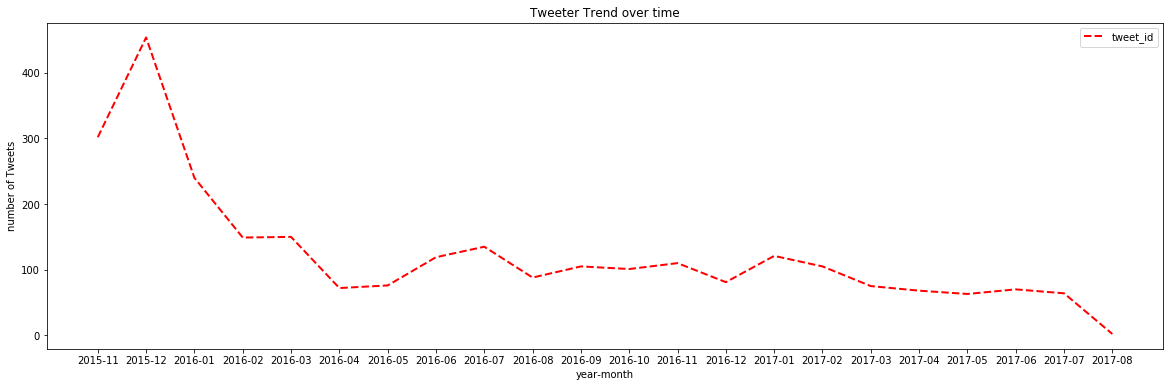

In [196]:
# creating the time series plot

#figure size
plt.figure(figsize=(20, 6))
            
             
#chaging the datatype of month_year column to string for plotting
plt.plot(chart_data['month_year'].astype(str), chart_data['tweet_id'],
            '--',
             color='r',   
         linewidth=2.0  
         
             
             )


plt.ylabel('number of Tweets')
plt.xlabel('year-month')
plt.title('Tweeter Trend over time')

plt.legend()

plt.show()


### Insights: 2:- 

2.Top 10 dogs with highest favorite count?

from the viz 2 we have observed below is the list of top 10 dogs with highest favorite count


Jamesy,
Sunny,
Charlie,
Lucy,
Zoey,
Duddles,
Stephan,
Boomer,
Penny
and Stanley

### Visualization - 2 - workings

### Visualization

In [188]:
#grouping (summing) favorite_count by dog name for plotting
chart_data2=master_data1[['favorite_count']].groupby(by=master_data1['name'],as_index=True).sum()

#droping the duplicates if any
chart_data2.drop_duplicates(keep=False)


chart_data2['name']=chart_data2.index

#sorting the data in desending order and moving that to new vaiable
chart_data2v1=chart_data2.sort_values(ascending=False,by=['favorite_count'])

#top 15 uncleaned items 
chart_data2v1.head(15)

,favorite_count,name
name,,
None,7191752.0,None
Bo,295382.0,Bo
a,227129.0,a
Jamesy,213654.0,Jamesy
Sunny,139435.0,Sunny
Charlie,118174.0,Charlie
Lucy,114931.0,Lucy
Zoey,113581.0,Zoey
Duddles,107956.0,Duddles


In [189]:
#as observed above we found that below items in above list are not valid names so making the list of these list so that we can remove.
l=['None','Bo','a','quite']

for i in l:
    index_names= chart_data2v1.loc[(chart_data2v1.name==i)].index
    #dropping the invalid names from the list
    chart_data2v1.drop(index_names,inplace= True)

In [190]:
#chacking to see if changes been implemented.
chart_data2v1.head(10)

,favorite_count,name
name,,
Jamesy,213654.0,Jamesy
Sunny,139435.0,Sunny
Charlie,118174.0,Charlie
Lucy,114931.0,Lucy
Zoey,113581.0,Zoey
Duddles,107956.0,Duddles
Stephan,107015.0,Stephan
Boomer,106489.0,Boomer
Penny,102986.0,Penny


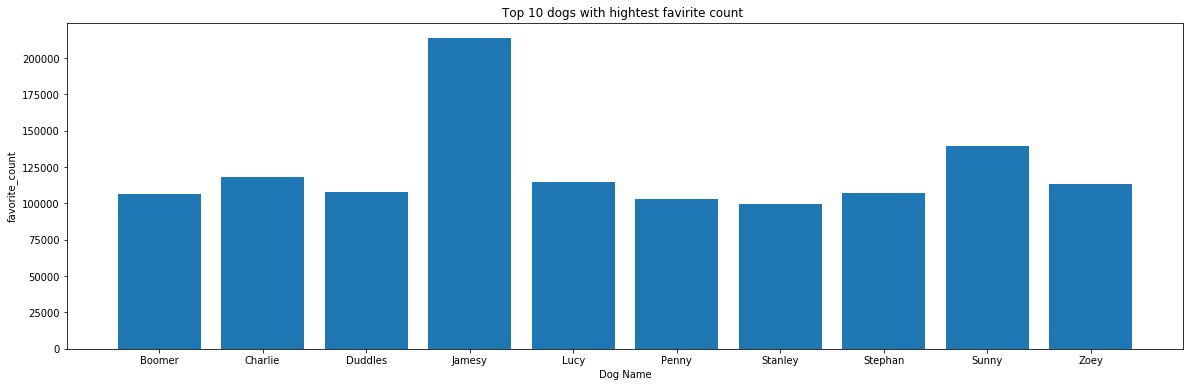

In [191]:

# creating the bar plot

#figure size
plt.figure(figsize=(20, 6))

#bar plot with top 10 dogs with hightest favirite count
plt.bar('name','favorite_count',data=chart_data2v1.head(10))  
      
         

plt.ylabel('favorite_count')
plt.xlabel('Dog Name')
plt.title('Top 10 dogs with hightest favirite count ')


        

plt.show()

3.Top 5 Rated Dogs?

### Insights: 3:- 
from the below analysis we have observed that below is the list of top 5 rated dogs:-
Sunny,
Walter,
Ollie,
Gabe
and Clifford





In [192]:

#moving required columns for analysing purpose


chart_data3=master_data1[['tweet_id','rating_neu_clean','name']]

#droping the duplicates if any
chart_data3.drop_duplicates(keep=False)



#sorting the data in desending order and moving that to new vaiable
chart_data3v1=chart_data3.sort_values(ascending=False,by=['rating_neu_clean'])

#checking the top 25 uncleaned items
chart_data3v1.head(25)






,tweet_id,rating_neu_clean,name
55,881633300179243008,17.0,None
291,838085839343206401,15.0,None
285,838916489579200512,15.0,None
2392,819006400881917954,14.0,Sunny
123,868880397819494401,14.0,Walter
866,762035686371364864,14.0,None
141,864873206498414592,14.0,None
2433,755206590534418437,14.0,one
149,863079547188785154,14.0,None
2498,807621403335917568,14.0,Ollie


In [193]:
#as observed above we found that below items in above list are not valid names so making the list of these list so that we can remove.
l=['None','Bo','a','one']

for i in l:
    index_names= chart_data3v1.loc[(chart_data3v1.name==i)].index
    chart_data3v1.drop(index_names,inplace= True)

In [194]:
#top 5 dogs with highest ratings
chart_data3v1.head(6)

,tweet_id,rating_neu_clean,name
2392,819006400881917954,14.0,Sunny
123,868880397819494401,14.0,Walter
2498,807621403335917568,14.0,Ollie
2487,822462944365645825,14.0,Gabe
2391,819015331746349057,14.0,Sunny
117,870063196459192321,14.0,Clifford
